In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [36]:
def show_random_samples(dataset, num_samples=5):

    class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
        ]


    
    indices = random.sample(range(len(dataset)), num_samples) 

    plt.figure(figsize=(10, 5))
    
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image = image.squeeze(0)                # Remove the channel dimension (C, H, W -> H, W)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{class_names[label]}")

    plt.tight_layout()
    
    plt.show()

---

**TÄVLING! Sifferklassificering med Fully Connected Neural Networks**

Välkommen till dagens tävling! Vi ska arbeta med det kända MNIST-datasetet, och försöka bygga en så bra classificationmodell som möjligt.

---

**Ladda ner data**

Notera att vi här kan ladda ner MNIST datasetet direkt, och att vi i den nedladdningen definiera olika transformationer på vår data. Detta är väldigt behjälpligt när vi jobbat med bilddata.
Vi kan exempelvis ändra om datatypen typp tensorer direkt, och även normalisera datan. 

Nedan anger vi två värden (en för varje axel, vi jobbar med 2d bilder här) till normalize, 0.5 i båda fallen - och vi kommer således att normalisera datan till att anta värden som följer en normalfördelning med medelvärde 0.5.  

Läs mer om tranformations i Pytorch [här](https://pytorch.org/vision/stable/transforms.html).

In [37]:
# Normalization transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load training and test datasets with normalization
trainset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)


In [38]:
def calculate_mean_std(dataset):
    """calculate mean and standard deviation of a dataset"""
    mean = 0.0
    std = 0.0
    total_images = len(dataset)

    for img, _ in dataset:
        mean += img.mean()
        std += img.std()

    mean /= total_images
    std /= total_images

    return mean.item(), std.item()

mean, std = calculate_mean_std(trainset)

print(f'mean: {mean}, std: {std}')

mean: -0.42791980504989624, std: 0.6409092545509338


In [39]:
# normalization transform
transform = transforms.Compose([transforms.ToTensor()])

# load training and test datasets with normalization
trainset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)

In [40]:
mean, std = calculate_mean_std(trainset)

print(f'mean: {mean}, std: {std}')

mean: 0.28604063391685486, std: 0.3204546272754669


In [41]:
# normalization transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

# load training and test datasets with normalization
trainset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)

In [42]:
mean, std = calculate_mean_std(trainset)

print(f'mean: {mean}, std: {std}')

mean: -7.240076627113012e-08, std: 0.9999945759773254


In [43]:
round(mean, 4)

-0.0

*Uppgift 1.1*

Undersök vad som nu finns i trainset. Does it make sense?

Till din hjälp kan du använda använda funktionen *show_random_samples* definierad ovan.

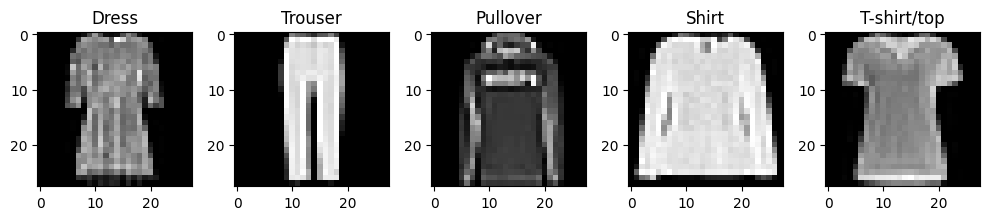

In [44]:
# TODO: work it out

show_random_samples(trainset, num_samples=5)

*Uppgift 1.2*

Vilken storlek/shape har varje training sample? Vad händer om du använder metoden .flatten() på en training sample?

Tips, kolla upp ex. trainset[0]. Vad innehåller den?

In [45]:
# TODO: work it out
print(trainset[0][1])
print(trainset[0][0].shape)
print(trainset[0][0].flatten().shape)


9
torch.Size([1, 28, 28])
torch.Size([784])


Dataloaders skapar vi nedan. Notera att vi väljer batch_size här.

In [46]:
BATCH_SIZE = 32

# Dataloaders
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

---

**Nätverk**

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(self, input_size, output_size).__init__()
        self.flatten = nn.Flatten()
        self.linear(input_size, 128)

        # TODO: Implement rest of layers and activations

    def forward(self, x):
        x = self.flatten(x)
        
        # TODO: implement forward propagation, note that flatten must be the first action (why?)

        return x

---

**Train and eval loop**



- Sätt upp en träningsloop i PyTorch. Bestäm modell arkitektur själv samt regularisering, dropout etc.

- Iterera! Den som får bästa och stabilaste resultatet vinner priset!!

Glöm inte att även spara train- och testloss (likt hur vi gjort tidigare) så att ni kan plotta kurvorna!

In [9]:
EPOCHS = 
LEARNING_RATE = 
INPUT_SIZE = 
input_size =
output_size = 

model = NeuralNetwork(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss() # our new loss, for multiclass classification
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)


for epoch in range(EPOCHS):
    
    model.train()

    for images, labels in trainloader:
        
        images, labels = images.to(device), labels.to(device)   # lägger över träningsdata till device (gpu om tillgänglig) innan leverans till modellen

    # TODO work work work

SyntaxError: invalid syntax (309699758.py, line 1)

[epoch 1] train loss: 0.6943, test loss: 0.5101, accuracy: 8161/10000 (82%)
[epoch 2] train loss: 0.4563, test loss: 0.4509, accuracy: 8390/10000 (84%)
[epoch 3] train loss: 0.4178, test loss: 0.4422, accuracy: 8408/10000 (84%)
[epoch 4] train loss: 0.3912, test loss: 0.4151, accuracy: 8518/10000 (85%)
[epoch 5] train loss: 0.3731, test loss: 0.4024, accuracy: 8550/10000 (86%)
[epoch 6] train loss: 0.3584, test loss: 0.4045, accuracy: 8545/10000 (85%)
[epoch 7] train loss: 0.3464, test loss: 0.3911, accuracy: 8595/10000 (86%)
[epoch 8] train loss: 0.3361, test loss: 0.4061, accuracy: 8490/10000 (85%)
[epoch 9] train loss: 0.3284, test loss: 0.3760, accuracy: 8631/10000 (86%)
[epoch 10] train loss: 0.3200, test loss: 0.3831, accuracy: 8596/10000 (86%)
[epoch 11] train loss: 0.3131, test loss: 0.3939, accuracy: 8563/10000 (86%)
[epoch 12] train loss: 0.3057, test loss: 0.3968, accuracy: 8557/10000 (86%)
[epoch 13] train loss: 0.3014, test loss: 0.3675, accuracy: 8652/10000 (87%)
[epoch 1

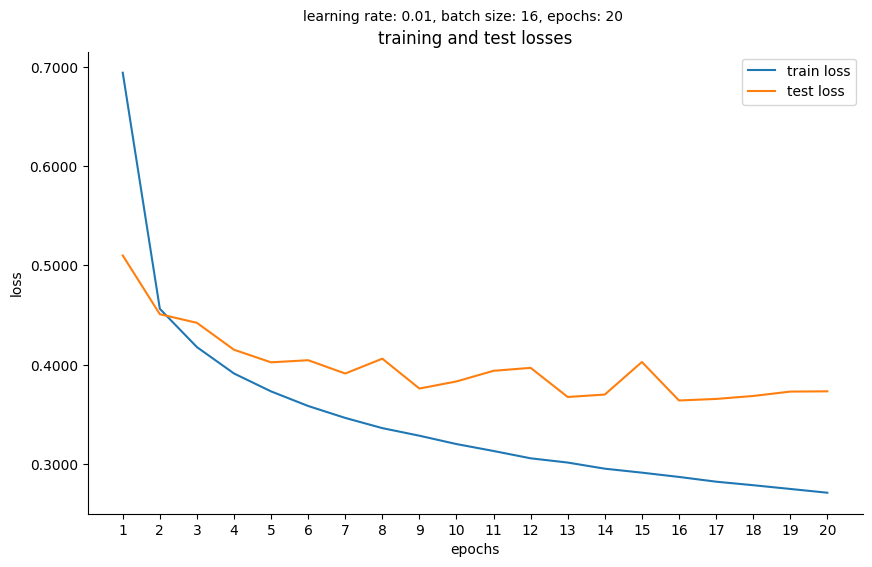

In [11]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        # x = self.softmax(x)
        return x

import torch.nn.functional as F
from torch.optim import SGD, Adam, Adadelta
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, input_size, output_size, device, batch_size=16, learning_rate=0.001, verbose=True, l2_lambda=0.0):
        self.input_size = input_size
        self.output_size = output_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model
        self.model = Net(input_size, output_size).to(device)

        # loss function based on output size
        if output_size == 1:
            self.loss_function = torch.nn.BCELoss()
        else:
            self.loss_function = torch.nn.CrossEntropyLoss()


        self.optimizer = SGD(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        # self.optimizer = Adadelta(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        
        # initialize storage for epoch averages of losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            
            if self.output_size == 1:
                target = target.float()  # ensure target is float for BCEWithLogitsLoss
            
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()

            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            
            if self.output_size == 1:
                predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            else:
                _, predicted = torch.max(output, dim=1)  # get predicted class indices for multi-class
            
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)  # save loss for this epoch

            train_loss = self.train_losses[-1]  # get latest epoch average training loss

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {train_loss:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, '
                    f'accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self, start_epoch=None, end_epoch=None):
        plt.figure(figsize=(10, 6))
        
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1
        
        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        plt.plot(epochs, train_losses, label='train loss')
        plt.plot(epochs, test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')

        plt.suptitle(f'learning rate: {self.learning_rate}, '
                    f'batch size: {self.batch_size}, '
                    f'epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)

        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # show at most 20 ticks on x-axis
        max_ticks = 20
        step = max(len(epochs) // max_ticks, 1)
        plt.xticks(list(epochs)[::step])
        
        plt.grid(False)
        sns.despine()
        plt.show()


# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=16,
    learning_rate=0.01,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=20
) 

[epoch 1] train loss: 0.7018, test loss: 0.5091, accuracy: 8139/10000 (81%)
[epoch 2] train loss: 0.4639, test loss: 0.4659, accuracy: 8309/10000 (83%)
[epoch 3] train loss: 0.4212, test loss: 0.4499, accuracy: 8343/10000 (83%)
[epoch 4] train loss: 0.3952, test loss: 0.4339, accuracy: 8451/10000 (85%)
[epoch 5] train loss: 0.3769, test loss: 0.4217, accuracy: 8466/10000 (85%)
[epoch 6] train loss: 0.3627, test loss: 0.4006, accuracy: 8551/10000 (86%)
[epoch 7] train loss: 0.3531, test loss: 0.3846, accuracy: 8623/10000 (86%)
[epoch 8] train loss: 0.3426, test loss: 0.3939, accuracy: 8585/10000 (86%)
[epoch 9] train loss: 0.3357, test loss: 0.3868, accuracy: 8603/10000 (86%)
[epoch 10] train loss: 0.3284, test loss: 0.3733, accuracy: 8674/10000 (87%)


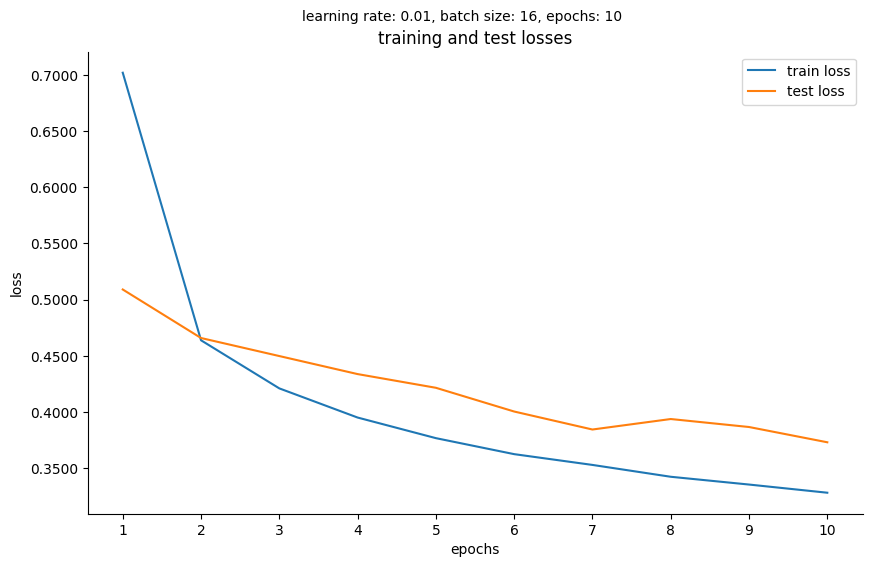

In [13]:
# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=16,
    learning_rate=0.01,
    l2_lambda=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10
) 

[epoch 1] train loss: 0.9720, test loss: 0.5997, accuracy: 7745/10000 (77%)
[epoch 2] train loss: 0.5192, test loss: 0.4856, accuracy: 8224/10000 (82%)
[epoch 3] train loss: 0.4520, test loss: 0.4482, accuracy: 8384/10000 (84%)
[epoch 4] train loss: 0.4152, test loss: 0.4153, accuracy: 8486/10000 (85%)
[epoch 5] train loss: 0.3875, test loss: 0.4154, accuracy: 8489/10000 (85%)
[epoch 6] train loss: 0.3691, test loss: 0.4029, accuracy: 8561/10000 (86%)
[epoch 7] train loss: 0.3540, test loss: 0.3742, accuracy: 8659/10000 (87%)
[epoch 8] train loss: 0.3391, test loss: 0.3706, accuracy: 8641/10000 (86%)
[epoch 9] train loss: 0.3279, test loss: 0.3821, accuracy: 8601/10000 (86%)
[epoch 10] train loss: 0.3180, test loss: 0.3526, accuracy: 8733/10000 (87%)


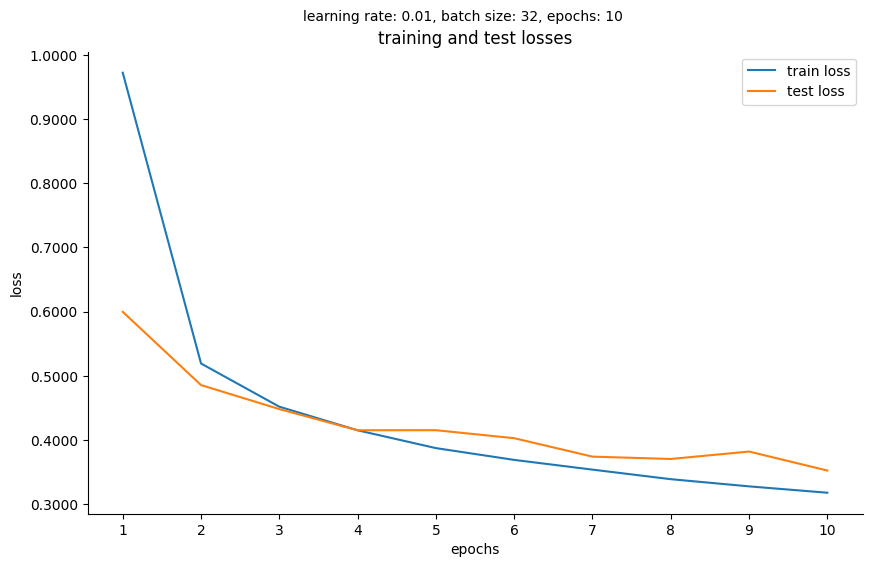

In [27]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.01,
    l2_lambda=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10
) 

[epoch 11] train loss: 0.2903, test loss: 0.3406, accuracy: 8774/10000 (88%)
[epoch 12] train loss: 0.2862, test loss: 0.3392, accuracy: 8775/10000 (88%)
[epoch 13] train loss: 0.2845, test loss: 0.3382, accuracy: 8791/10000 (88%)
[epoch 14] train loss: 0.2827, test loss: 0.3392, accuracy: 8772/10000 (88%)
[epoch 15] train loss: 0.2808, test loss: 0.3363, accuracy: 8796/10000 (88%)


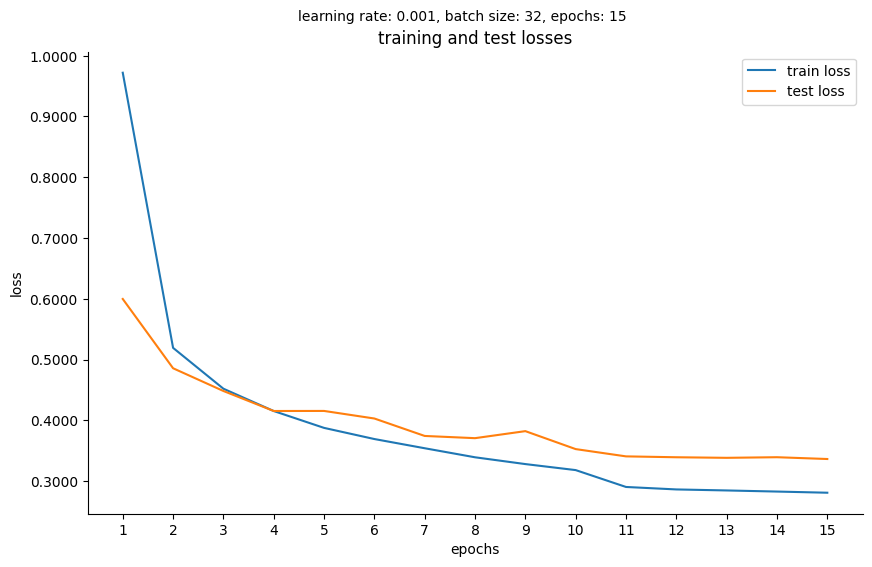

In [29]:
trainer.set_learning_rate(0.001)

trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=5
) 

[epoch 1] train loss: 0.5913, test loss: 0.4511, accuracy: 8330/10000 (83%)
[epoch 2] train loss: 0.4042, test loss: 0.4198, accuracy: 8469/10000 (85%)
[epoch 3] train loss: 0.3576, test loss: 0.3757, accuracy: 8631/10000 (86%)
[epoch 4] train loss: 0.3289, test loss: 0.3590, accuracy: 8695/10000 (87%)
[epoch 5] train loss: 0.3073, test loss: 0.3540, accuracy: 8747/10000 (87%)
[epoch 6] train loss: 0.2904, test loss: 0.3437, accuracy: 8776/10000 (88%)
[epoch 7] train loss: 0.2788, test loss: 0.3363, accuracy: 8796/10000 (88%)
[epoch 8] train loss: 0.2691, test loss: 0.3311, accuracy: 8814/10000 (88%)
[epoch 9] train loss: 0.2629, test loss: 0.3233, accuracy: 8836/10000 (88%)
[epoch 10] train loss: 0.2569, test loss: 0.3214, accuracy: 8857/10000 (89%)


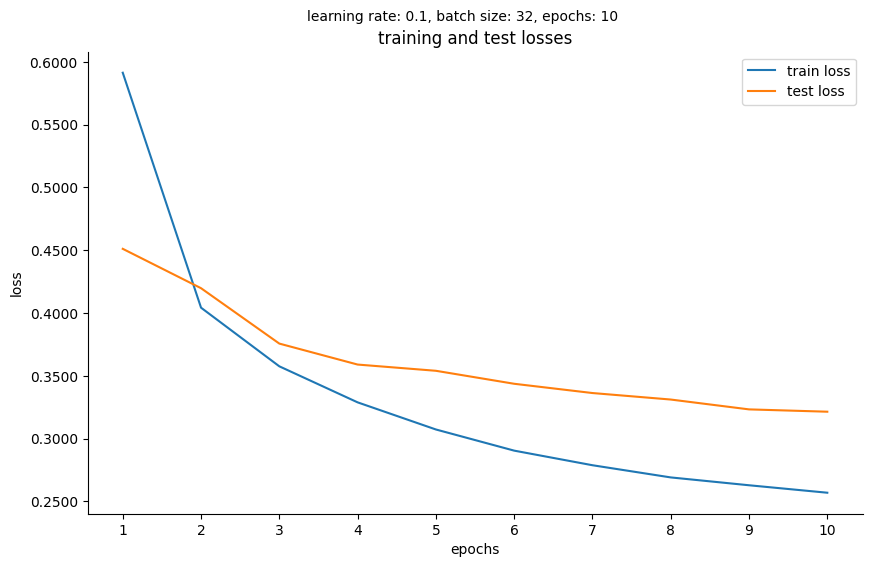

In [31]:
# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.1,
    l2_lambda=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.7
) 

[epoch 1] train loss: 0.6432, test loss: 0.5208, accuracy: 8145/10000 (81%)
[epoch 2] train loss: 0.4581, test loss: 0.4389, accuracy: 8384/10000 (84%)
[epoch 3] train loss: 0.4195, test loss: 0.4004, accuracy: 8523/10000 (85%)
[epoch 4] train loss: 0.3938, test loss: 0.3968, accuracy: 8550/10000 (86%)
[epoch 5] train loss: 0.3750, test loss: 0.3743, accuracy: 8619/10000 (86%)
[epoch 6] train loss: 0.3541, test loss: 0.3657, accuracy: 8685/10000 (87%)
[epoch 7] train loss: 0.3428, test loss: 0.3692, accuracy: 8686/10000 (87%)
[epoch 8] train loss: 0.3318, test loss: 0.3537, accuracy: 8707/10000 (87%)
[epoch 9] train loss: 0.3192, test loss: 0.3500, accuracy: 8727/10000 (87%)
[epoch 10] train loss: 0.3116, test loss: 0.3399, accuracy: 8774/10000 (88%)


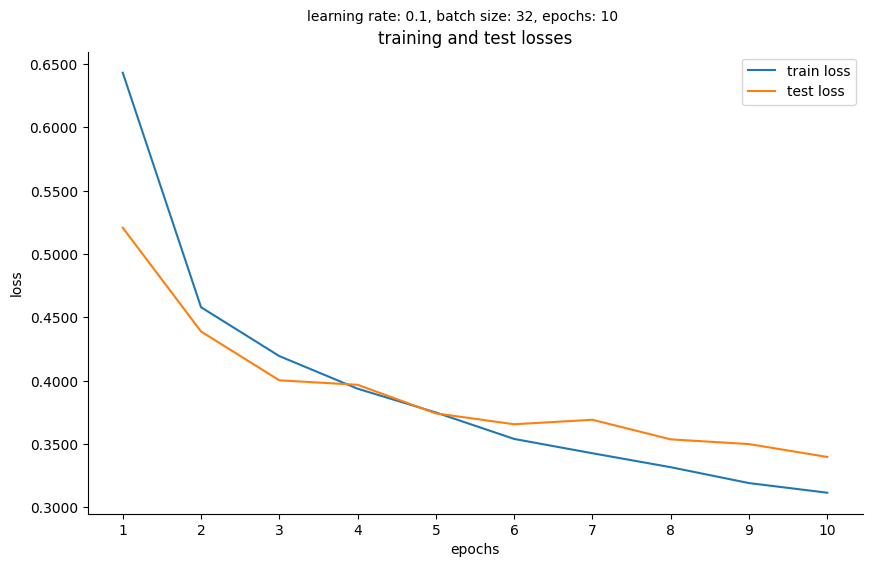

In [38]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.4)
        self.dropout2 = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.1,
    l2_lambda=0.002,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.8
) 

[epoch 1] train loss: 0.6196, test loss: 0.4839, accuracy: 8159/10000 (82%)
[epoch 2] train loss: 0.4282, test loss: 0.4054, accuracy: 8542/10000 (85%)
[epoch 3] train loss: 0.3868, test loss: 0.4058, accuracy: 8529/10000 (85%)
[epoch 4] train loss: 0.3611, test loss: 0.3711, accuracy: 8654/10000 (87%)
[epoch 5] train loss: 0.3430, test loss: 0.3653, accuracy: 8674/10000 (87%)
[epoch 6] train loss: 0.3280, test loss: 0.3592, accuracy: 8693/10000 (87%)
[epoch 7] train loss: 0.3165, test loss: 0.3559, accuracy: 8734/10000 (87%)
[epoch 8] train loss: 0.3073, test loss: 0.3527, accuracy: 8740/10000 (87%)
[epoch 9] train loss: 0.2992, test loss: 0.3420, accuracy: 8785/10000 (88%)
[epoch 10] train loss: 0.2922, test loss: 0.3380, accuracy: 8798/10000 (88%)


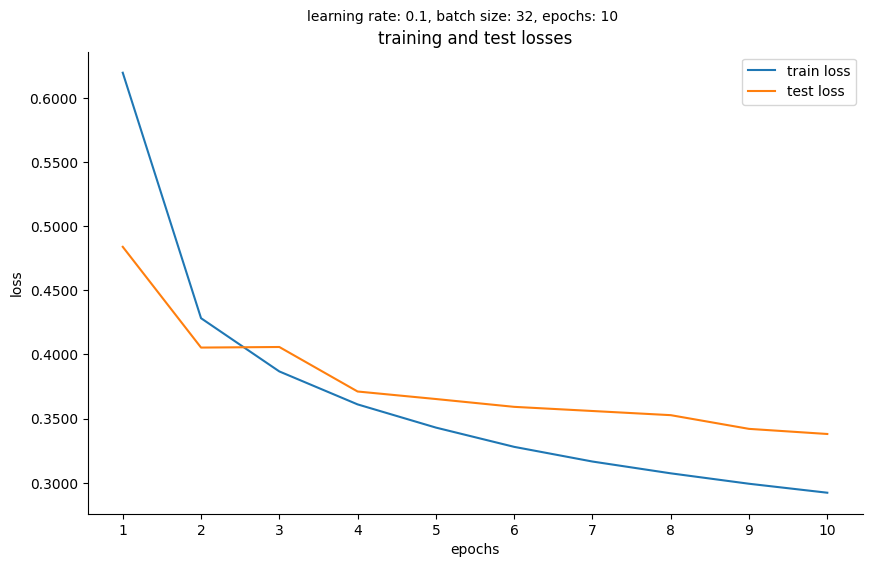

In [47]:
import torch.nn.functional as F
from torch.optim import SGD, Adam, Adadelta
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, input_size, output_size, device, batch_size=16, learning_rate=0.001, verbose=True, l2_lambda=0.0):
        self.input_size = input_size
        self.output_size = output_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model
        self.model = Net(input_size, output_size).to(device)

        # loss function based on output size
        if output_size == 1:
            self.loss_function = torch.nn.BCELoss()
        else:
            self.loss_function = torch.nn.CrossEntropyLoss()


        # self.optimizer = SGD(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        self.optimizer = Adadelta(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        
        # initialize storage for epoch averages of losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            
            if self.output_size == 1:
                target = target.float()  # ensure target is float for BCEWithLogitsLoss
            
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()

            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            
            if self.output_size == 1:
                predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            else:
                _, predicted = torch.max(output, dim=1)  # get predicted class indices for multi-class
            
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)  # save loss for this epoch

            train_loss = self.train_losses[-1]  # get latest epoch average training loss

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {train_loss:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, '
                    f'accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self, start_epoch=None, end_epoch=None):
        plt.figure(figsize=(10, 6))
        
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1
        
        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        plt.plot(epochs, train_losses, label='train loss')
        plt.plot(epochs, test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')

        plt.suptitle(f'learning rate: {self.learning_rate}, '
                    f'batch size: {self.batch_size}, '
                    f'epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)

        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # show at most 20 ticks on x-axis
        max_ticks = 20
        step = max(len(epochs) // max_ticks, 1)
        plt.xticks(list(epochs)[::step])
        
        plt.grid(False)
        sns.despine()
        plt.show()

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout1(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.1,
    l2_lambda=0.002,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.8
)

[epoch 11] train loss: 0.2883, test loss: 0.3347, accuracy: 8807/10000 (88%)
[epoch 12] train loss: 0.2840, test loss: 0.3338, accuracy: 8820/10000 (88%)
[epoch 13] train loss: 0.2817, test loss: 0.3311, accuracy: 8831/10000 (88%)
[epoch 14] train loss: 0.2783, test loss: 0.3328, accuracy: 8836/10000 (88%)
[epoch 15] train loss: 0.2747, test loss: 0.3292, accuracy: 8844/10000 (88%)
[epoch 16] train loss: 0.2747, test loss: 0.3312, accuracy: 8814/10000 (88%)
[epoch 17] train loss: 0.2713, test loss: 0.3284, accuracy: 8846/10000 (88%)
[epoch 18] train loss: 0.2701, test loss: 0.3278, accuracy: 8850/10000 (88%)
[epoch 19] train loss: 0.2679, test loss: 0.3258, accuracy: 8845/10000 (88%)
[epoch 20] train loss: 0.2664, test loss: 0.3241, accuracy: 8857/10000 (89%)


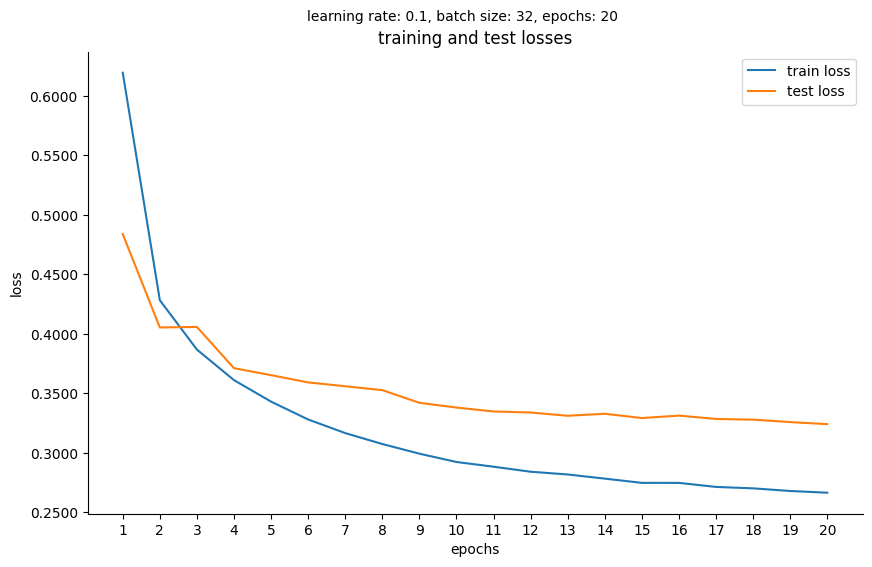

In [48]:
# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.9
)

[epoch 21] train loss: 0.2647, test loss: 0.3265, accuracy: 8859/10000 (89%)
[epoch 22] train loss: 0.2635, test loss: 0.3245, accuracy: 8843/10000 (88%)
[epoch 23] train loss: 0.2632, test loss: 0.3242, accuracy: 8859/10000 (89%)
[epoch 24] train loss: 0.2610, test loss: 0.3230, accuracy: 8863/10000 (89%)
[epoch 25] train loss: 0.2601, test loss: 0.3215, accuracy: 8861/10000 (89%)
[epoch 26] train loss: 0.2582, test loss: 0.3225, accuracy: 8862/10000 (89%)
[epoch 27] train loss: 0.2599, test loss: 0.3239, accuracy: 8856/10000 (89%)
[epoch 28] train loss: 0.2575, test loss: 0.3222, accuracy: 8856/10000 (89%)
[epoch 29] train loss: 0.2564, test loss: 0.3218, accuracy: 8852/10000 (89%)
[epoch 30] train loss: 0.2565, test loss: 0.3210, accuracy: 8883/10000 (89%)


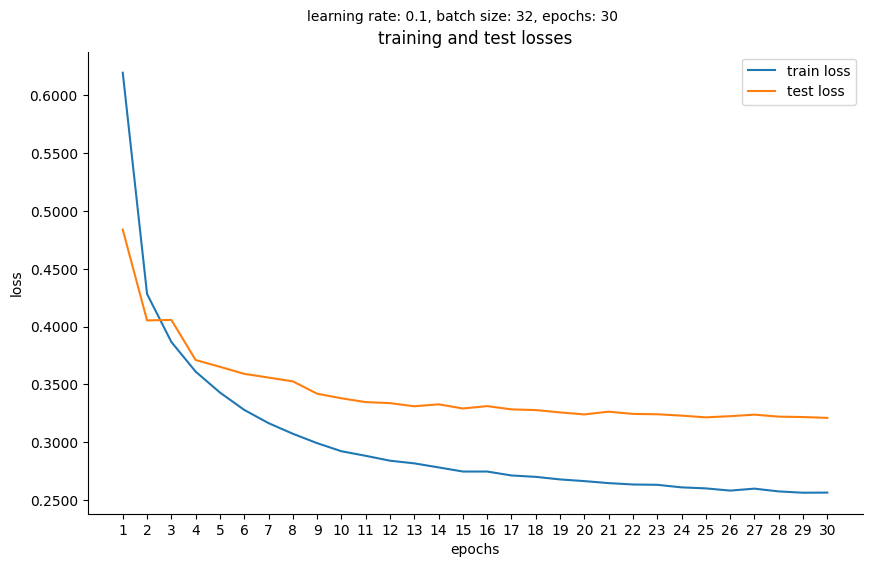

In [49]:
# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.9
)

[epoch 31] train loss: 0.2569, test loss: 0.3212, accuracy: 8866/10000 (89%)
[epoch 32] train loss: 0.2552, test loss: 0.3216, accuracy: 8859/10000 (89%)
[epoch 33] train loss: 0.2566, test loss: 0.3212, accuracy: 8862/10000 (89%)
[epoch 34] train loss: 0.2545, test loss: 0.3212, accuracy: 8868/10000 (89%)
[epoch 35] train loss: 0.2564, test loss: 0.3209, accuracy: 8879/10000 (89%)
[epoch 36] train loss: 0.2546, test loss: 0.3210, accuracy: 8875/10000 (89%)
[epoch 37] train loss: 0.2547, test loss: 0.3207, accuracy: 8867/10000 (89%)
[epoch 38] train loss: 0.2544, test loss: 0.3203, accuracy: 8866/10000 (89%)
[epoch 39] train loss: 0.2536, test loss: 0.3205, accuracy: 8866/10000 (89%)
[epoch 40] train loss: 0.2539, test loss: 0.3202, accuracy: 8863/10000 (89%)


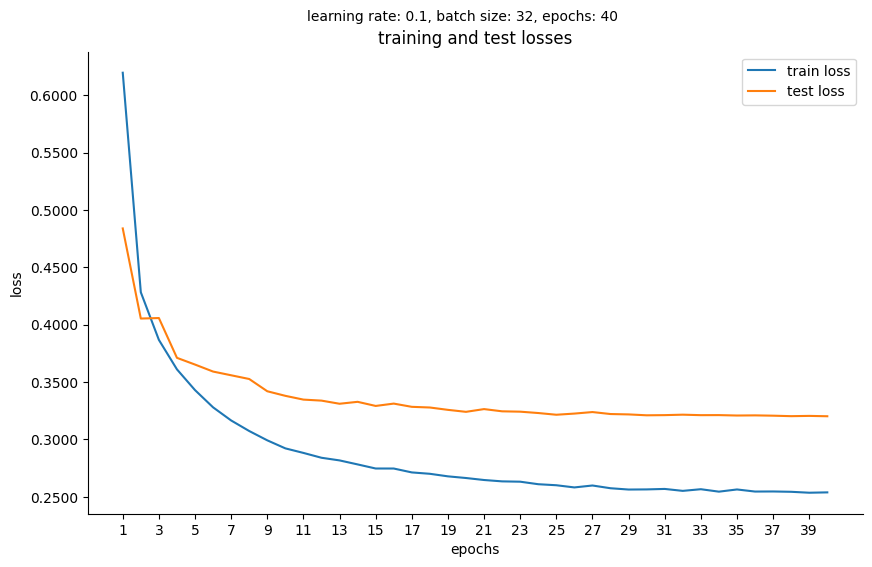

In [50]:
# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.9
)

[epoch 1] train loss: 0.8329, test loss: 0.5688, accuracy: 7901/10000 (79%)
[epoch 2] train loss: 0.4710, test loss: 0.4491, accuracy: 8406/10000 (84%)
[epoch 3] train loss: 0.4165, test loss: 0.4246, accuracy: 8457/10000 (85%)
[epoch 4] train loss: 0.3813, test loss: 0.3932, accuracy: 8581/10000 (86%)
[epoch 5] train loss: 0.3565, test loss: 0.3841, accuracy: 8619/10000 (86%)
[epoch 6] train loss: 0.3416, test loss: 0.3689, accuracy: 8687/10000 (87%)
[epoch 7] train loss: 0.3276, test loss: 0.3655, accuracy: 8690/10000 (87%)
[epoch 8] train loss: 0.3180, test loss: 0.3541, accuracy: 8748/10000 (87%)
[epoch 9] train loss: 0.3117, test loss: 0.3530, accuracy: 8771/10000 (88%)
[epoch 10] train loss: 0.3059, test loss: 0.3519, accuracy: 8767/10000 (88%)


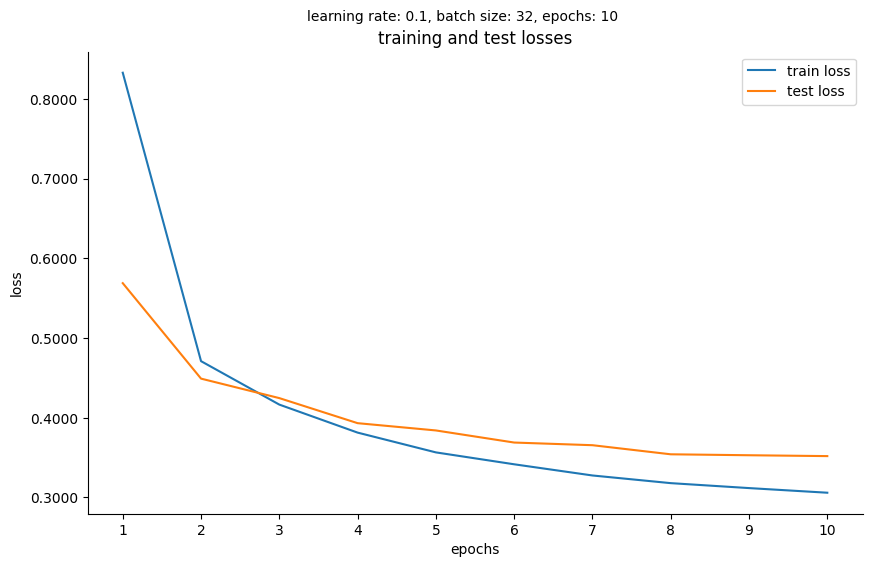

In [51]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout1(x)
        x = self.relu(self.fc3(x))
        x = self.dropout1(x)
        x = self.relu(self.fc4(x))
        x = self.dropout1(x)
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.1,
    l2_lambda=0.002,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.7
)

In [8]:
import torch.nn.functional as F
from torch.optim import SGD, Adam, Adadelta
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, input_size, output_size, device, batch_size=16, learning_rate=0.001, verbose=True, l2_lambda=0.0):
        self.input_size = input_size
        self.output_size = output_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model
        self.model = Net(input_size, output_size).to(device)

        # loss function based on output size
        if output_size == 1:
            self.loss_function = torch.nn.BCELoss()
        else:
            self.loss_function = torch.nn.CrossEntropyLoss()


        # self.optimizer = SGD(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        self.optimizer = Adadelta(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        
        # initialize storage for epoch averages of losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            
            if self.output_size == 1:
                target = target.float()  # ensure target is float for BCEWithLogitsLoss
            
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()

            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            
            if self.output_size == 1:
                predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            else:
                _, predicted = torch.max(output, dim=1)  # get predicted class indices for multi-class
            
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)  # save loss for this epoch

            train_loss = self.train_losses[-1]  # get latest epoch average training loss

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {train_loss:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, '
                    f'accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self, start_epoch=None, end_epoch=None):
        plt.figure(figsize=(10, 6))
        
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1
        
        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        plt.plot(epochs, train_losses, label='train loss')
        plt.plot(epochs, test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')

        plt.suptitle(f'learning rate: {self.learning_rate}, '
                    f'batch size: {self.batch_size}, '
                    f'epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)

        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # show at most 20 ticks on x-axis
        max_ticks = 20
        step = max(len(epochs) // max_ticks, 1)
        plt.xticks(list(epochs)[::step])
        
        plt.grid(False)
        sns.despine()
        plt.show()

## CNN

[epoch 1] train loss: 0.8558, test loss: 0.5154, accuracy: 8116/10000 (81%)
[epoch 2] train loss: 0.4504, test loss: 0.3988, accuracy: 8552/10000 (86%)
[epoch 3] train loss: 0.3742, test loss: 0.3820, accuracy: 8630/10000 (86%)
[epoch 4] train loss: 0.3321, test loss: 0.3294, accuracy: 8860/10000 (89%)
[epoch 5] train loss: 0.3052, test loss: 0.3251, accuracy: 8854/10000 (89%)
[epoch 6] train loss: 0.2888, test loss: 0.3024, accuracy: 8918/10000 (89%)
[epoch 7] train loss: 0.2738, test loss: 0.2953, accuracy: 8959/10000 (90%)
[epoch 8] train loss: 0.2633, test loss: 0.2866, accuracy: 8988/10000 (90%)
[epoch 9] train loss: 0.2558, test loss: 0.2867, accuracy: 8972/10000 (90%)
[epoch 10] train loss: 0.2513, test loss: 0.2858, accuracy: 9000/10000 (90%)


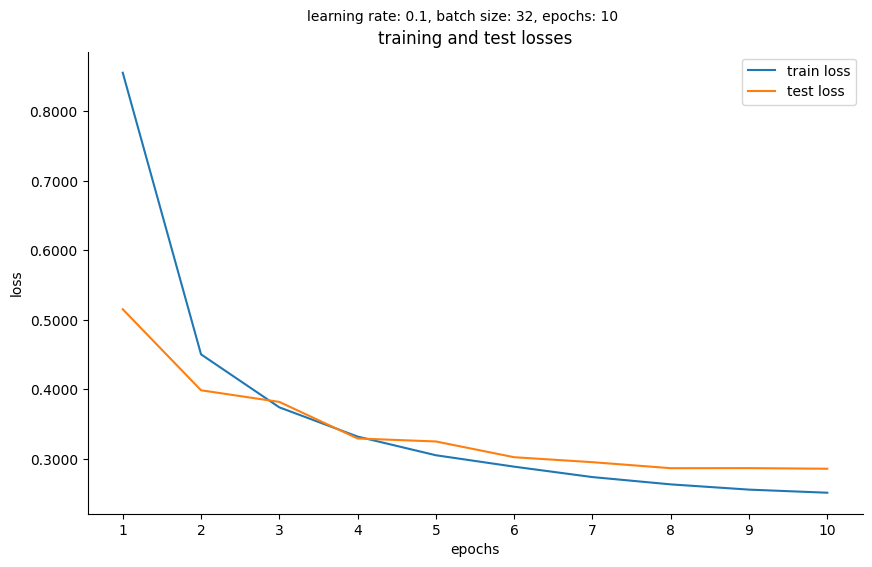

In [10]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # calculate the size after conv and pool for the flatten operation
        # for MNIST/Fashion-MNIST (28x28 images):
        # after conv1: 26x26
        # after pool: 13x13
        # after flatten: 13 * 13 * 32 = 5408
        flattened_size = 5408

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(flattened_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)
        
    def forward(self, x):
        # conv1
        x = self.pool(self.relu(self.conv1(x)))

        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout1(x)
        x = self.relu(self.fc3(x))
        x = self.dropout1(x)
        x = self.relu(self.fc4(x))
        x = self.dropout1(x)
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.1,
    l2_lambda=0.002,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=100,
    gamma=0.7
)

[epoch 1] train loss: 0.7986, test loss: 0.5149, accuracy: 8101/10000 (81%)
[epoch 2] train loss: 0.4066, test loss: 0.3651, accuracy: 8701/10000 (87%)
[epoch 3] train loss: 0.3268, test loss: 0.3232, accuracy: 8874/10000 (89%)
[epoch 4] train loss: 0.2885, test loss: 0.2895, accuracy: 8982/10000 (90%)
[epoch 5] train loss: 0.2616, test loss: 0.2798, accuracy: 9021/10000 (90%)
[epoch 6] train loss: 0.2420, test loss: 0.2640, accuracy: 9038/10000 (90%)
[epoch 7] train loss: 0.2294, test loss: 0.2614, accuracy: 9061/10000 (91%)
[epoch 8] train loss: 0.2177, test loss: 0.2542, accuracy: 9101/10000 (91%)
[epoch 9] train loss: 0.2076, test loss: 0.2519, accuracy: 9109/10000 (91%)
[epoch 10] train loss: 0.2027, test loss: 0.2471, accuracy: 9124/10000 (91%)


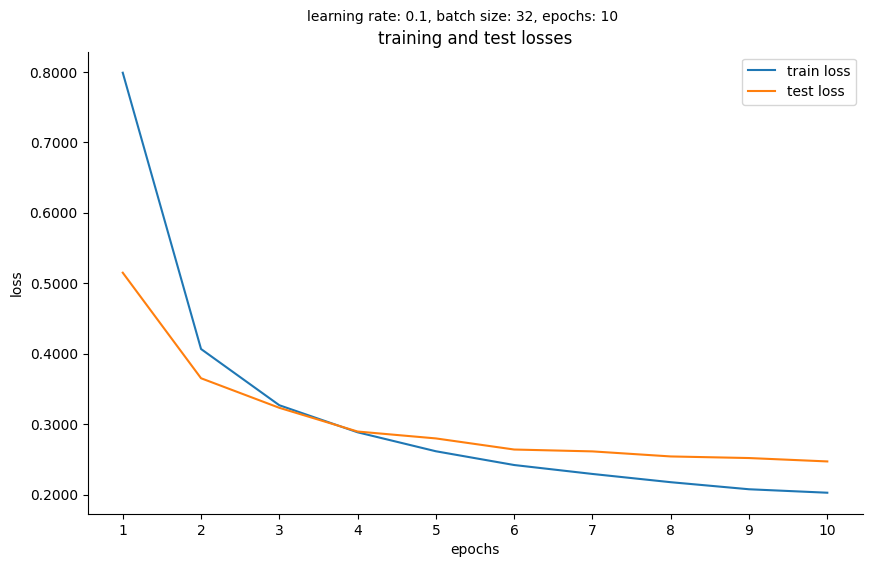

In [46]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # calculate the size after conv and pool for the flatten operation
        # for MNIST/Fashion-MNIST (28x28 images):
        # after conv1: 26x26
        # after conv2: 24x24
        # after pool: 12x12
        # after flatten: 12 * 12 * 64 = 9216
        flattened_size = 9216

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(flattened_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)
        
    def forward(self, x):
        # conv1
        x = self.relu(self.conv1(x))

        # conv2
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout1(x)
        x = self.relu(self.fc3(x))
        x = self.dropout1(x)
        x = self.relu(self.fc4(x))
        x = self.dropout1(x)
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=0.1,
    l2_lambda=0.002,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.7
)

[epoch 1] train loss: 0.5406, test loss: 0.3648, accuracy: 8770/10000 (88%)
[epoch 2] train loss: 0.3734, test loss: 0.3242, accuracy: 8831/10000 (88%)
[epoch 3] train loss: 0.3312, test loss: 0.2947, accuracy: 8937/10000 (89%)
[epoch 4] train loss: 0.3009, test loss: 0.2717, accuracy: 9063/10000 (91%)
[epoch 5] train loss: 0.2779, test loss: 0.2692, accuracy: 9051/10000 (91%)
[epoch 6] train loss: 0.2574, test loss: 0.2631, accuracy: 9086/10000 (91%)
[epoch 7] train loss: 0.2416, test loss: 0.2436, accuracy: 9134/10000 (91%)
[epoch 8] train loss: 0.2247, test loss: 0.2353, accuracy: 9203/10000 (92%)
[epoch 9] train loss: 0.2145, test loss: 0.2293, accuracy: 9197/10000 (92%)
[epoch 10] train loss: 0.2070, test loss: 0.2262, accuracy: 9228/10000 (92%)
[epoch 11] train loss: 0.1982, test loss: 0.2196, accuracy: 9234/10000 (92%)
[epoch 12] train loss: 0.1925, test loss: 0.2234, accuracy: 9238/10000 (92%)
[epoch 13] train loss: 0.1870, test loss: 0.2184, accuracy: 9244/10000 (92%)
[epoch 1

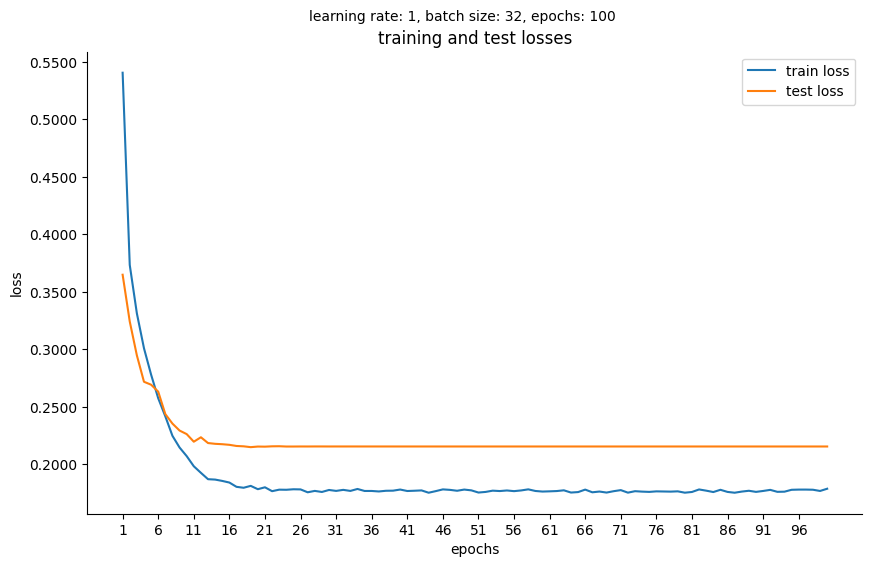

In [97]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # calculate the size after conv and pool for the flatten operation
        # for MNIST/Fashion-MNIST (28x28 images):
        # after conv1: 26x26
        # after conv2: 24x24
        # after pool: 12x12
        # after flatten: 12 * 12 * 64 = 9216
        flattened_size = 9216

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(flattened_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        
    def forward(self, x):
        # conv1
        x = self.relu(self.conv1(x))
        # conv2
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.dropout1(x)

        # neural network
        # layer 1
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)

        # layer 2
        x = self.relu(self.fc2(x))
        x = self.dropout1(x)

        # layer 3
        x = self.relu(self.fc3(x))
        x = self.dropout1(x)

        # layer 4
        x = self.fc4(x)

        return x

# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=1,
    l2_lambda=0.002,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=100,
    gamma=0.7
)

In [48]:
import torch.nn.functional as F
from torch.optim import SGD, Adam, Adadelta
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, model_class, input_size, output_size, device, batch_size=16, learning_rate=0.001, optimizer='SGD', verbose=True, l2_lambda=0.0):
        self.input_size = input_size
        self.output_size = output_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements

        # initialize model
        self.model = model_class(input_size, output_size).to(device)

        # loss function based on output size
        if output_size == 1:
            self.loss_function = torch.nn.BCELoss()
        else:
            self.loss_function = torch.nn.CrossEntropyLoss()

        # Initialize optimizer based on the provided name
        optimizer = optimizer.lower()
        if optimizer == 'sgd':
            self.optimizer = SGD(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        elif optimizer == 'adam':
            self.optimizer = Adam(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        elif optimizer == 'adadelta':
            self.optimizer = Adadelta(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        else:
            raise ValueError(f"Unsupported optimizer: {optimizer}. Choose from 'SGD', 'Adam', 'Adadelta'.")

        # initialize storage for epoch averages of losses and accuracy
        self.train_losses = []
        self.test_losses = []
        self.accuracies = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr

    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)

    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []

        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))

        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()  # ensure target is float for BCEWithLogitsLoss

            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()

            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                      f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                      f'loss: {loss.item():.6f}')

        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss

    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()

            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy

            if self.output_size == 1:
                predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            else:
                _, predicted = torch.max(output, dim=1)  # get predicted class indices for multi-class

            correct = (predicted == target).sum().item()
            total = target.size(0)

            self.test_losses.append(test_loss)  # save loss for this epoch
            accuracy = 100. * correct / total
            self.accuracies.append(accuracy)    # save accuracy for this epoch

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {self.train_losses[-1]:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({accuracy:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {self.train_losses[-1]:.4f}, test loss: {test_loss:.4f}, '
                      f'accuracy: {correct}/{total} ({accuracy:.0f}%)')
            return test_loss

    def plot_losses(self, ax, start_epoch=None, end_epoch=None):
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1

        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        ax.plot(epochs, train_losses, label='Train Loss')
        ax.plot(epochs, test_losses, label='Test Loss')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.set_title('Training and Test Losses')
        ax.legend()
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        ax.set_xticks(list(epochs)[::max(len(epochs) // 20, 1)])
        ax.grid(False)
        sns.despine()

    def plot_accuracy(self, ax, start_epoch=None, end_epoch=None):
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1

        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        accuracies = self.accuracies[start_index:end_index]

        ax.plot(epochs, accuracies, label='Accuracy', color='green')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy (%)')
        ax.set_title('Model Accuracy')
        ax.legend()
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
        ax.set_xticks(list(epochs)[::max(len(epochs) // 20, 1)])
        ax.grid(False)
        sns.despine()

    def plot_metrics(self, start_epoch=None, end_epoch=None):
        # Ensure start_epoch and end_epoch are set
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

        self.plot_losses(axes[0], start_epoch, end_epoch)
        self.plot_accuracy(axes[1], start_epoch, end_epoch)

        plt.suptitle(f'Learning rate: {self.learning_rate}, '
                    f'Batch size: {self.batch_size}, '
                    f'Epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs

        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()

        # plot both losses and accuracy side by side
        self.plot_metrics()

        return self.model

[epoch 1] train loss: 0.7152, test loss: 0.5389, accuracy: 8065/10000 (81%)
[epoch 2] train loss: 0.4630, test loss: 0.6035, accuracy: 7704/10000 (77%)
[epoch 3] train loss: 0.4093, test loss: 0.4575, accuracy: 8359/10000 (84%)
[epoch 4] train loss: 0.3853, test loss: 0.4151, accuracy: 8545/10000 (85%)
[epoch 5] train loss: 0.3729, test loss: 0.4063, accuracy: 8596/10000 (86%)
[epoch 6] train loss: 0.3623, test loss: 0.3911, accuracy: 8661/10000 (87%)
[epoch 7] train loss: 0.3558, test loss: 0.3897, accuracy: 8658/10000 (87%)
[epoch 8] train loss: 0.3516, test loss: 0.3866, accuracy: 8640/10000 (86%)
[epoch 9] train loss: 0.3502, test loss: 0.3825, accuracy: 8673/10000 (87%)
[epoch 10] train loss: 0.3484, test loss: 0.3791, accuracy: 8667/10000 (87%)
[epoch 11] train loss: 0.3459, test loss: 0.3785, accuracy: 8687/10000 (87%)
[epoch 12] train loss: 0.3461, test loss: 0.3775, accuracy: 8690/10000 (87%)
[epoch 13] train loss: 0.3453, test loss: 0.3769, accuracy: 8695/10000 (87%)
[epoch 1

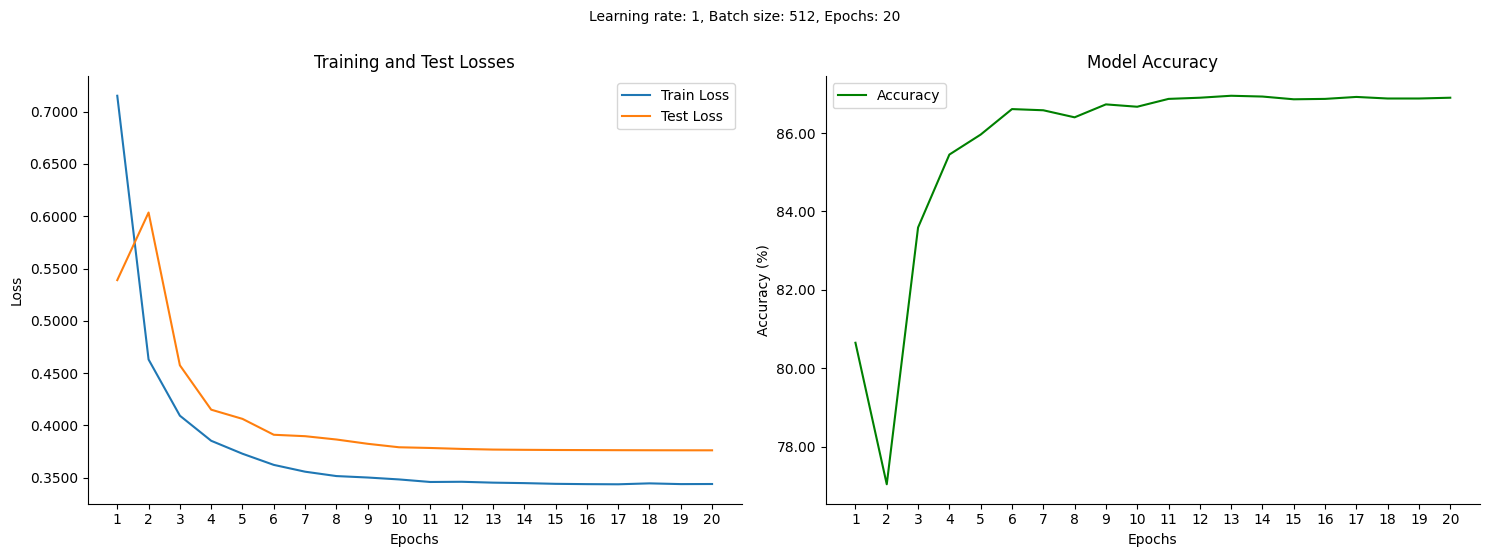

In [49]:
class UltraSimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        # Minimal conv layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Size calculation for flatten
        # after conv1: 14x14 (assuming input is 28x28)
        # flattened: 14 * 14 * 4 = 784
        flattened_size = 784

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(flattened_size, output_size)  # direct output layer

    def forward(self, x):
        # conv1 with pooling
        x = self.pool(self.conv1(x))

        # fully connected layer
        x = self.flatten(x)
        x = self.fc(x)

        return x

# Example usage
# initialize trainer
trainer = ModelTrainer(
    model_class=UltraSimpleNet,
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=512,  # larger batch size for faster training
    learning_rate=1,  # higher learning rate for quick convergence
    l2_lambda=0.002,
    verbose=False,
    optimizer='adadelta'
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.7
)

[epoch 1] train loss: 0.5833, test loss: 0.4893, accuracy: 8152/10000 (82%)
[epoch 2] train loss: 0.3648, test loss: 0.4613, accuracy: 8373/10000 (84%)
[epoch 3] train loss: 0.3244, test loss: 0.3564, accuracy: 8695/10000 (87%)
[epoch 4] train loss: 0.3022, test loss: 0.2987, accuracy: 8941/10000 (89%)
[epoch 5] train loss: 0.2888, test loss: 0.2972, accuracy: 8946/10000 (89%)
[epoch 6] train loss: 0.2788, test loss: 0.2846, accuracy: 8986/10000 (90%)
[epoch 7] train loss: 0.2743, test loss: 0.2811, accuracy: 9000/10000 (90%)
[epoch 8] train loss: 0.2701, test loss: 0.2861, accuracy: 8970/10000 (90%)
[epoch 9] train loss: 0.2690, test loss: 0.2775, accuracy: 9010/10000 (90%)
[epoch 10] train loss: 0.2664, test loss: 0.2771, accuracy: 9006/10000 (90%)
[epoch 11] train loss: 0.2658, test loss: 0.2756, accuracy: 9015/10000 (90%)
[epoch 12] train loss: 0.2674, test loss: 0.2753, accuracy: 9021/10000 (90%)
[epoch 13] train loss: 0.2643, test loss: 0.2748, accuracy: 9021/10000 (90%)
[epoch 1

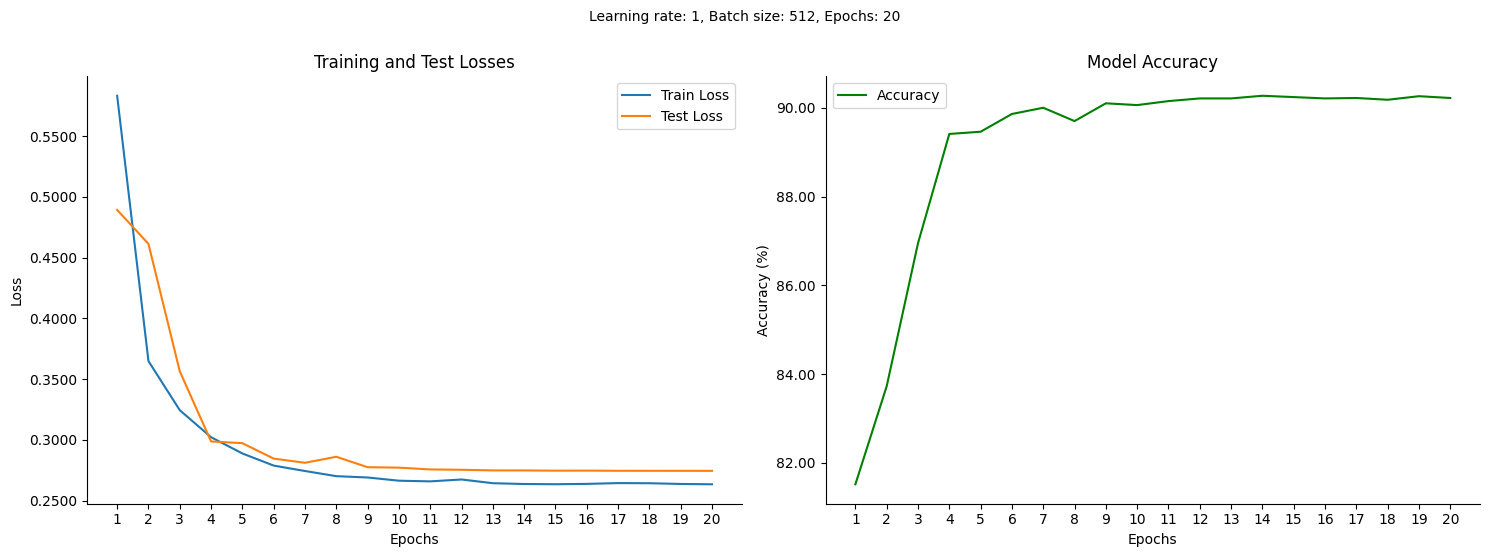

In [53]:
class SimpleConvNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        # conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(8)  # batch norm after first conv
        self.bn2 = nn.BatchNorm2d(16)  # batch norm after second conv

        # size calculation
        # 28x28 → conv2: 28x28 → pool: 14x14
        # 14x14 → conv2: 14x14 → pool: 7x7
        # 7x7 → flatten: 7 * 7 * 16 = 784
        flattened_size = 784

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(flattened_size, output_size)  # direct output layer
        self.dropout = nn.Dropout(0.3)  # regularization

    def forward(self, x):
        # conv1 + batch norm + pooling
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        # conv2 + batch norm + pooling
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        # flatten and fully connected layer
        x = self.flatten(x)
        x = self.dropout(x)  # apply dropout
        x = self.fc(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    SimpleConvNet,
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=512,  # larger batch size for faster training
    learning_rate=1,  # higher learning rate for quick convergence
    l2_lambda=0.002,
    verbose=False,
    optimizer='adadelta'
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=20,
    gamma=0.7
)

In [143]:
# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=32,  # batch size 32
    learning_rate=1,
    l2_lambda=0.002,
    verbose=False,
    optimizer='adadelta'
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10,
    gamma=0.7
)

[epoch 1] train loss: 0.5325, test loss: 0.4017, accuracy: 8647/10000 (86%)
[epoch 2] train loss: 0.3692, test loss: 0.3198, accuracy: 8888/10000 (89%)
[epoch 3] train loss: 0.3279, test loss: 0.2874, accuracy: 8976/10000 (90%)
[epoch 4] train loss: 0.2981, test loss: 0.2841, accuracy: 8983/10000 (90%)


KeyboardInterrupt: 

In [93]:
from torchinfo import summary

summary(trained_model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Conv2d: 1-1                            [1, 32, 26, 26]           320
├─ReLU: 1-2                              [1, 32, 26, 26]           --
├─MaxPool2d: 1-3                         [1, 32, 13, 13]           --
├─Conv2d: 1-4                            [1, 64, 11, 11]           18,496
├─ReLU: 1-5                              [1, 64, 11, 11]           --
├─MaxPool2d: 1-6                         [1, 64, 5, 5]             --
├─Dropout: 1-7                           [1, 64, 5, 5]             --
├─Flatten: 1-8                           [1, 1600]                 --
├─Linear: 1-9                            [1, 128]                  204,928
├─ReLU: 1-10                             [1, 128]                  --
├─Dropout: 1-11                          [1, 128]                  --
├─Linear: 1-12                           [1, 10]                   1,290
To

In [94]:
from torchsummary import summary

summary(trained_model, input_size=(1, 28, 28))

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─MaxPool2d: 1-3                         --
├─Flatten: 1-4                           --
├─Linear: 1-5                            204,928
├─Linear: 1-6                            1,290
├─ReLU: 1-7                              --
├─Dropout: 1-8                           --
├─Dropout: 1-9                           --
Total params: 225,034
Trainable params: 225,034
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─MaxPool2d: 1-3                         --
├─Flatten: 1-4                           --
├─Linear: 1-5                            204,928
├─Linear: 1-6                            1,290
├─ReLU: 1-7                              --
├─Dropout: 1-8                           --
├─Dropout: 1-9                           --
Total params: 225,034
Trainable params: 225,034
Non-trainable params: 0

In [95]:
total_params = 0
for name, param in trained_model.named_parameters():
    if param.requires_grad:  # Only count trainable parameters
        num_params = param.numel()  # Get the number of elements in the parameter tensor
        total_params += num_params
        print(f"{name}: {num_params}")

print(f"Total trainable parameters: {total_params}")

conv1.weight: 288
conv1.bias: 32
conv2.weight: 18432
conv2.bias: 64
fc1.weight: 204800
fc1.bias: 128
fc2.weight: 1280
fc2.bias: 10
Total trainable parameters: 225034


In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=trainset[0][0].numel(),
    output_size=10,
    device=device,
    batch_size=16,
    learning_rate=0.01,
    l2_lambda=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    test_set=testset,
    num_epochs=10
) 

In [ ]:
class ModelTrainer:
    def __init__(self, input_size, output_size, device, batch_size=16, learning_rate=0.001, verbose=True, l2_lambda=0.0):
        self.input_size = input_size
        self.output_size = output_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model
        self.model = Net(input_size, output_size).to(device)

        # loss function based on output size
        if output_size == 1:
            self.loss_function = torch.nn.BCELoss()
        else:
            self.loss_function = torch.nn.CrossEntropyLoss()


        self.optimizer = SGD(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        # self.optimizer = Adadelta(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        
        # initialize storage for epoch averages of losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            
            if self.output_size == 1:
                target = target.float()  # ensure target is float for BCEWithLogitsLoss
            
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()

            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            
            if self.output_size == 1:
                predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            else:
                _, predicted = torch.max(output, dim=1)  # get predicted class indices for multi-class
            
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)  # save loss for this epoch

            train_loss = self.train_losses[-1]  # get latest epoch average training loss

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {train_loss:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, '
                    f'accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self, start_epoch=None, end_epoch=None):
        plt.figure(figsize=(10, 6))
        
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1
        
        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        plt.plot(epochs, train_losses, label='train loss')
        plt.plot(epochs, test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')

        plt.suptitle(f'learning rate: {self.learning_rate}, '
                    f'batch size: {self.batch_size}, '
                    f'epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)

        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # show at most 20 ticks on x-axis
        max_ticks = 20
        step = max(len(epochs) // max_ticks, 1)
        plt.xticks(list(epochs)[::step])
        
        plt.grid(False)
        sns.despine()
        plt.show()